# Predicting with Logistic Regression Part1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('dataset.csv')
df[:5]

,x1,x2,y
0,-0.234491,0.054177,1
1,-0.127876,0.188275,0
2,0.072853,0.158058,0
3,0.408208,0.163343,1
4,-0.298318,-0.027766,1


In [6]:
df.shape

(500, 3)

In [7]:
n = 500
df.y.value_counts()/500

0    0.63
1    0.37
Name: y, dtype: float64

In [10]:
y = df.y
X = df.drop(['y'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.40,
                                                 stratify = y,
                                                 random_state=0)

### Scatterplot on the train set

In [11]:
X_train[:5]

,x1,x2
296,-0.400831,-0.262735
175,0.395445,-0.080027
354,0.481018,-0.282178
396,0.159821,0.093595
158,-0.222244,0.251504


In [12]:
df_train = X_train.copy()
df_train['y'] = y_train
df_train.shape

(200, 3)

In [13]:
df_train0 = df_train[df_train.y==0]
df_train1 = df_train[df_train.y==1]

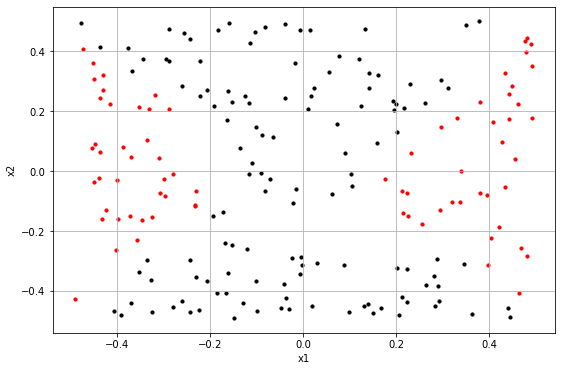

In [14]:
plt.figure(figsize = (9,6))
plt.scatter(df_train0.x1,df_train0.x2,s=10,color='k')
plt.scatter(df_train1.x1,df_train1.x2,s=10,color='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## Logistic Regression

In [15]:
model = LogisticRegression(solver = 'lbfgs',C = 1e20)
model.fit(X_train,y_train)
yhat = model.predict(X_test)
model.score(X_test,y_test)

0.63

In [16]:
pd.crosstab(y_test,yhat,rownames=['y_test'],colnames=['predictions'])

predictions,0
y_test,
0,189
1,111


Logistic regression predicts all equal to zero.<br> 
Since there are 63% rows with y = 0 then the accuracy rate of logistic regression is 63%

### Expand the dataset

In [17]:
X = df.drop(['y'],axis=1)
X = PolynomialFeatures().fit_transform(X)

In [18]:
Xext = pd.DataFrame(X)
Xext[:5]

,0,1,2,3,4,5
0,1.0,-0.234491,0.054177,0.054986,-0.012704,0.002935
1,1.0,-0.127876,0.188275,0.016352,-0.024076,0.035448
2,1.0,0.072853,0.158058,0.005308,0.011515,0.024982
3,1.0,0.408208,0.163343,0.166634,0.066678,0.026681
4,1.0,-0.298318,-0.027766,0.088994,0.008283,0.000771


In [19]:
list3 = ['1','x1', 'x2', 'x11','x12','x22']
X = pd.DataFrame(X,columns = list3)
X[:5]

,1,x1,x2,x11,x12,x22
0,1.0,-0.234491,0.054177,0.054986,-0.012704,0.002935
1,1.0,-0.127876,0.188275,0.016352,-0.024076,0.035448
2,1.0,0.072853,0.158058,0.005308,0.011515,0.024982
3,1.0,0.408208,0.163343,0.166634,0.066678,0.026681
4,1.0,-0.298318,-0.027766,0.088994,0.008283,0.000771


### Logistic Regression on Expanded dataset -no regularization

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.40,
                                                 stratify = y,
                                                 random_state=0)

In [21]:
model = LogisticRegression(solver = 'lbfgs',C = 1e20)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
model.score(X_test,y_test)

0.99

In [22]:
pd.crosstab(y_test,ypred,rownames=['y_test'],colnames=['predictions'])

predictions,0,1
y_test,,
0,189,0
1,3,108


In [23]:
# 3 mistakes

### Logistic Regression on Expanded dataset -with regularization

In [24]:
# Plot Test Acuracy Rate vs C_values

In [25]:
alphas = 10**np.linspace(-3,-4,1000)
alphas[-5:]

array([0.00010093, 0.00010069, 0.00010046, 0.00010023, 0.0001    ])

In [26]:
alphas[:5]

array([0.001     , 0.0009977 , 0.0009954 , 0.00099311, 0.00099082])

In [27]:
C_values = 1/alphas
C_values[-5:]

array([ 9908.228099  ,  9931.09181375,  9954.00828762,  9976.97764236,
       10000.        ])

In [28]:
C_values[:5]

array([1000.        , 1002.30754828, 1004.62042135, 1006.93863148,
       1009.26219099])

In [29]:
model = model = LogisticRegression(solver = 'lbfgs')
arates = []

In [30]:
for i in C_values:
    model.set_params(C = i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    arates.append(model.score(X_test,y_test))

In [31]:
df9 = pd.DataFrame(arates,columns = ['A_Rates'])
df9.index = C_values
df9.index.name = 'C_values'
df9

,A_Rates
C_values,
1000.000000,0.97
1002.307548,0.97
1004.620421,0.97
1006.938631,0.97
1009.262191,0.97
...,...
9908.228099,0.99
9931.091814,0.99
9954.008288,0.99


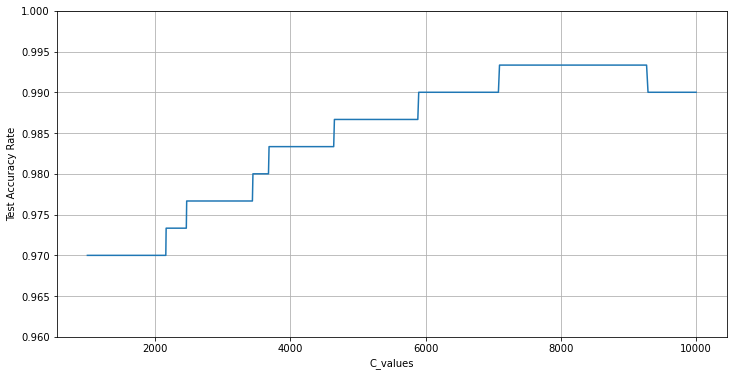

In [32]:
df9.plot(figsize =(12,6),logx=False,
         grid=True,legend=False,ylim = (0.96,1.0))
plt.ylabel('Test Accuracy Rate');

In [33]:
a = arates.index(max(arates))
a

850

In [34]:
c = C_values[a]
c

7093.341204987997

In [35]:
arates[a]

0.9933333333333333

In [36]:
model = LogisticRegression(solver = 'lbfgs',C = c)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
model.score(X_test,y_test)

0.9933333333333333

In [35]:
pd.crosstab(y_test,ypred,rownames=['y_test'],colnames=['predictions'])

predictions,0,1
y_test,,
0,189,0
1,2,109


In [1]:
# Two misclassified obs